In [1]:
import numpy as np
from rdkit import Chem, Geometry
from rdkit.Chem import Draw, rdDetermineBonds, AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True
import rdkit
import re
data_files = ['rmd17_aspirin.npz', 'rmd17_azobenzene.npz', 'rmd17_benzene.npz', 'rmd17_ethanol.npz', 
                'rmd17_malonaldehyde.npz', 'rmd17_naphthalene.npz', 'rmd17_paracetamol.npz', 'rmd17_salicylic.npz', 
                'rmd17_toluene.npz', 'rmd17_uracil.npz']

In [2]:
idx = 0
dataset = np.load(data_files[idx])
print(dataset.files)

['nuclear_charges', 'coords', 'energies', 'forces']


In [3]:
data_charges = dataset['nuclear_charges']
data_coords = dataset['coords']
data_energies = dataset['energies']
data_forces = dataset['forces']

# 1.利用rdkit添加化学键信息
具体做法参考`old_test`文件夹下的`analysis_data.ipynb`中的有关部分

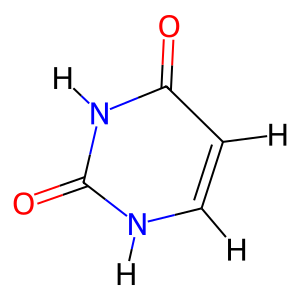

In [181]:
coord_idx = 6
rd_mol = Chem.RWMol()
mol_num = data_charges.shape[0]
rd_conf = Chem.Conformer(int(mol_num))
for i in range(mol_num):
    rd_atom = Chem.Atom(int(data_charges[i]))
    rd_mol.AddAtom(rd_atom)
    rd_coords = Geometry.Point3D(float(data_coords[coord_idx][i][0]), 
                                 float(data_coords[coord_idx][i][1]), 
                                 float(data_coords[coord_idx][i][2]))
    rd_conf.SetAtomPosition(i, rd_coords)
rd_mol.AddConformer(rd_conf)
mol = rd_mol.GetMol()
conn_mol = Chem.Mol(mol)
rdDetermineBonds.DetermineBonds(conn_mol,charge=0)
Draw.MolToImage(conn_mol)

In [182]:
print(conn_mol.GetNumAtoms(),conn_mol.GetNumBonds())

12 12


In [136]:
statis = Chem.MolToMolBlock(conn_mol)
bonds = re.findall(r'([1-9][0-9^.]*)\s+([1-9][0-9^.]*)\s+([1-9^.])\s+0\s+', statis)#键信息
data_bonds = np.array(bonds).astype(int)
print(data_bonds)

[[ 1  2  2]
 [ 1  6  1]
 [ 1 12  1]
 [ 2  3  1]
 [ 2  9  1]
 [ 3  4  1]
 [ 3 10  1]
 [ 4  5  1]
 [ 4  7  2]
 [ 5  6  1]
 [ 5 11  1]
 [ 6  8  2]]


In [138]:
save_file = data_files[idx].split('.')
save_file = '../train/' + save_file[0] +'_new.' + save_file[1]
np.savez(save_file, nuclear_charges=data_charges, 
         coords=data_coords, energies=data_energies, 
         forces=data_forces, bonds=data_bonds)